<a href="https://colab.research.google.com/github/riooooorio/Chinese-Poetry-Generation/blob/master/ML_Classifier_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import seaborn as sns

In [14]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
df = pd.read_csv(r'https://res.cloudinary.com/adminixtrator/raw/upload/v1589140900/mhen_data.csv')

In [16]:
df = df.sample(frac=1).reset_index(drop=True)# shuffle
df.head()

,id,code,chapter,description,adl,attachment,attention,avoidance,behavior,cogdev,communication,prereq,concentration,delusion,detachment,duration,feeling,hallucination,iho,impulse,motor,onset,orientation,rigidity,risk,selfconcept,selfharm,sensory,sleep,sexual,somatic,substance,thought
0,130,F65.51_1,1,"Over a period of at least 6 months, recurrent ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,116,F60.7_18,18,Needs others to assume responsibility for most...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,100,F51.01_12,12,"Difficulty maintaining sleep, characterized by...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,37,F71_1,1,Deficits in adaptive functioning that result i...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,L98.1_6,6,The skin picking causes clinically significant...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
df.groupby("chapter").count()

,id,code,description,adl,attachment,attention,avoidance,behavior,cogdev,communication,prereq,concentration,delusion,detachment,duration,feeling,hallucination,iho,impulse,motor,onset,orientation,rigidity,risk,selfconcept,selfharm,sensory,sleep,sexual,somatic,substance,thought
chapter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
2,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
7,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
9,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [0]:
X = df.drop(["id", "chapter", "description", "code"], axis=1)
y = df["code"]

In [19]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'F44.4_9': 4, 'F45.22_6': 3, 'F10.10_16': 2, 'F13.10_16': 2, 'F44.5_9': 2, 'F18.20_16': 2, 'F10.20_16': 2, 'F18.10_16': 2, 'F06.2_2': 2, 'F16.10_16': 2, 'F19.10_16': 2, 'F13.20_16': 2, 'F42_6': 2, 'F44.81_8': 2, 'F16.20_16': 2, 'G47.419_12': 2, 'F06.0_2': 2, 'F19.20_16': 2, 'F05_17': 2, 'F44.7_9': 2, 'F72_1': 2, 'F44.6_9': 2, 'F73_1': 2, 'F65.51_1': 1, 'F60.7_18': 1, 'F51.01_12': 1, 'F71_1': 1, 'L98.1_6': 1, 'F88_1': 1, 'F65.4_19': 1, 'F25.0_2': 1, 'F95.1_1': 1, 'F17.203_16': 1, 'G47.37_1': 1, 'F65.51_9': 1, 'F52.31_13': 1, 'F65.3_19': 1, 'F21_18': 1, 'F43.10_7': 1, 'F93.0_5': 1, 'F06.4_5': 1, 'F94.2_7': 1, 'F65.52_19': 1, 'F70_1': 1, 'F34.8_4': 1, 'F48.1_8': 1, 'F12.20_16': 1, 'F23_2': 1, 'G47.52_12': 1, 'F15.93_16': 1, 'F43.23_7': 1, 'F82_1': 1, 'G47.09_1': 1, 'F79_1': 1, 'F84.0_1': 1, 'F52.22_13': 1, 'F65.81_1': 1, 'F98.21_10': 1, 'F90.1_1': 1, 'F98.1_11': 1, 'F80.0_1': 1, 'G47.35_1': 1, 'F40.248_5': 1, 'F41.8_5': 1, 'F17.200_16': 1, 'F68.10_9': 1, 'F60.3_18': 1, 'F45.21_9'

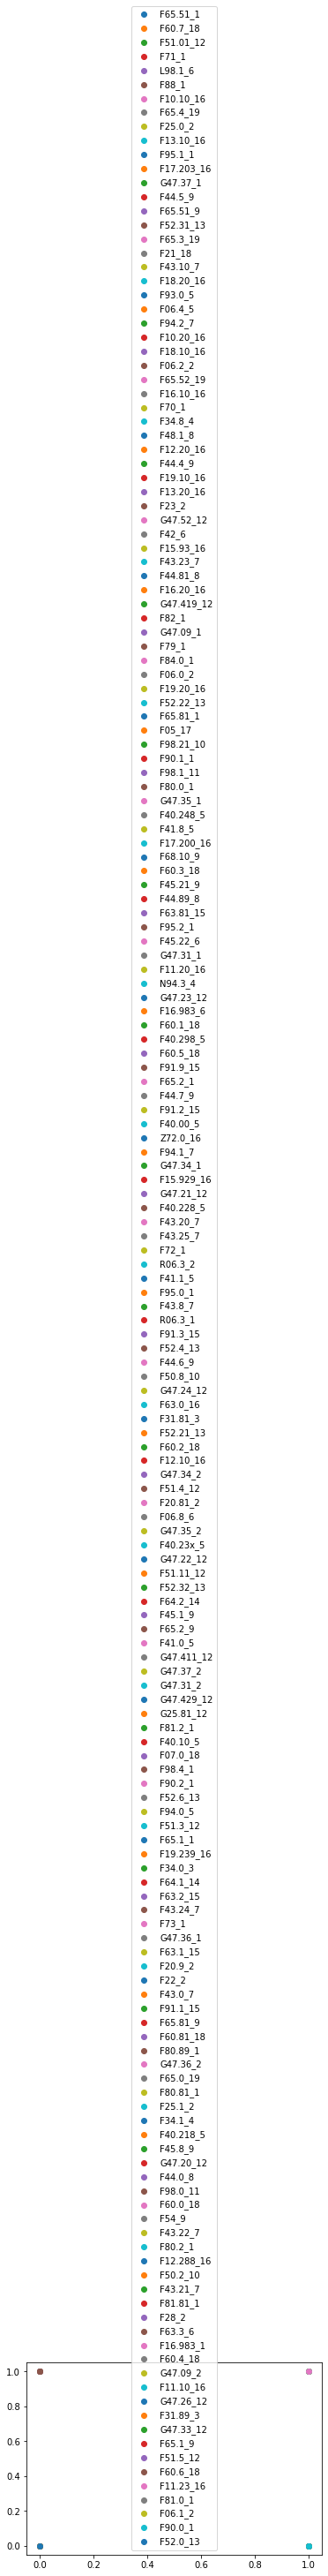

In [20]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

code
F05_17      2
F06.0_2     2
F06.1_2     1
F06.2_2     2
F06.4_5     1
           ..
L98.1_6     1
N94.3_4     1
R06.3_1     1
R06.3_2     1
Z72.0_16    1
Length: 181, dtype: int64


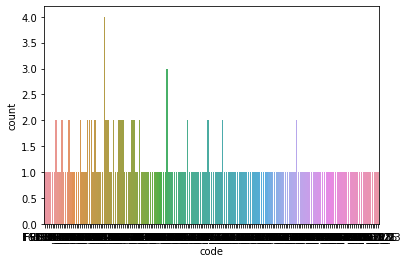

In [21]:
import seaborn as sns

print(df.groupby('code').size())

sns.countplot(x="code", data=df)

In [22]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))

multiclass


In [23]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    # print(X_train.shape)
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    # print(X_test.shape)
    y_test = y.iloc[test_index]
    # sm = SMOTE()
    rm = RandomOverSampler()
    X_train_oversampled, y_train_oversampled = rm.fit_sample(X_train, y_train)
    model = XGBClassifier()  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = model.predict(X_test.to_numpy())
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test.to_numpy(), y_test)}')
    print(f'f-score: {f1_score(y_test, y_pred, average="micro")}')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 1:
Accuracy: 0.09523809523809523
f-score: 0.09523809523809523


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 2:
Accuracy: 0.09523809523809523
f-score: 0.09523809523809523


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 3:
Accuracy: 0.0
f-score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 4:
Accuracy: 0.04878048780487805
f-score: 0.04878048780487805


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 5:
Accuracy: 0.024390243902439025
f-score: 0.024390243902439025


In [27]:
import pandas as pd
import numpy  as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# from sklearn.metrics import accuracy_scorelogs
from sklearn.model_selection import train_test_split
dupli_df= df.groupby(['code'])
df = dupli_df.first().reset_index().copy() #then how to assign back to df?
y = []
x = []
# for val in df["code"]:
#     y.append(val)

# clean dataset
df = df[df["code"].apply(lambda x : "_" in x and "." in x)].copy()


codes = df["code"].unique()





#need to oneHot encoding y
x=df[["adl","attachment","attention","avoidance","behavior","cogdev","communication","prereq","concentration","delusion","detachment","duration","feeling","hallucination","iho","impulse","motor","onset","orientation","rigidity","risk","selfconcept","selfharm","sensory","sleep","sexual","somatic","substance","thought"]]
# print(x)
#x.drop(columns=['id','description'], axis=1, inplace=True)
# print(df1)
#y set is ready
y1=df['code'].apply(lambda x : x.split(".")[0])
y2=df['code'].apply(lambda x : x.split(".")[1].split("_")[0])
y3=df['code'].apply(lambda x : x.split(".")[1].split("_")[1])


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
#from imblearn.over_sampling import SMOTE

def trainModel(x,y,clfname):
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    if clfname == "cf1":
        clf=RandomForestClassifier(n_estimators=200,max_depth=32)
    elif clfname == "cf2":
        clf=RandomForestClassifier(n_estimators=200,max_depth=32)
    else:
        clf=RandomForestClassifier(n_estimators=200,max_depth=32)
    clf.fit(x,y)
    y_pred=clf.predict(X_test)

    scoring = ['precision_macro', 'recall_macro','accuracy']
    scoring = ['accuracy']
    scores = cross_validate(clf, x, y, scoring=scoring,cv=6)
    print(scores)
    print("Your clf Accuracy:",scores['test_accuracy'].mean())
    return clf

#print("CF1")
clf1 = trainModel(x,y1,"cf1")
#print("CF2")
clf2 = trainModel(x,y2,"cf2")
#print("CF3")
clf3 = trainModel(x,y3,"cf3")

# input text -> most likely code
# input text, code -> how likely that code is


def predictCode(input_data):

    columns = ['adl','attachment','attention','avoidance','behavior','cogdev','communication','prereq','concentration','delusion'
    ,'detachment','duration','feeling','hallucination','iho','impulse','motor','onset','orientation','rigidity','risk',
    'selfconcept','selfharm','sensory','sleep','sexual','somatic','substance','thought']

    temp_df = pd.DataFrame([input_data],columns=columns)
    code_part1= clf1.predict(x)[0]
    code_part2 = clf2.predict(x)[0]
    code_part3 = clf3.predict(x)[0]

    return code_part1+"."+code_part2+"_"+code_part3

def mostLikelyCode(clf,x,n=2):
    classes = clf.classes_
    predictions = list(zip(classes,clf.predict_proba(x)[0]))
    predictions = list(filter(lambda x : x[1]>0,predictions))
    #print(predictions)
    return list(sorted(predictions, key=lambda x : x[1],reverse=True)[:n])

import itertools

def formula(p1,p2,p3):
    result = (p1*2 + p2*1 + p3*2)/5
    return str(round(100*result,2))+"%"

def predictCode2(input_data):

    columns = ['adl','attachment','attention','avoidance','behavior','cogdev','communication','prereq','concentration','delusion','detachment','duration','feeling','hallucination','iho','impulse','motor','onset','orientation','rigidity','risk','selfconcept','selfharm','sensory','sleep','sexual','somatic','substance','thought']

    temp_df = pd.DataFrame([input_data],columns=columns)
    code_part1 = mostLikelyCode(clf1,x)
    code_part2 = mostLikelyCode(clf2,x)
    code_part3 = mostLikelyCode(clf3,x)
    combinations = set(itertools.product(*[code_part1,code_part2,code_part3],))
    print(combinations)
    top_results = map(lambda x : x[0] + "   "  + x[1],sorted([(part1[0]+"."+part2[0]+"_"+part3[0], formula(part1[1],part2[1],part3[1])) for part1,part2,part3 in combinations],key=lambda x: x[1],reverse=True))

    return "\n".join(top_results)


def trainModel(x,y,clfname):
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    if clfname == "cf1":
        clf=RandomForestClassifier(n_estimators=250, max_depth=64, random_state=9)
    elif clfname == "cf2":
        clf=RandomForestClassifier(n_estimators=250, max_depth=64, random_state=9)
        #clf=GaussianNB()
        #clf=XGBClassifier()
    else:
        clf=RandomForestClassifier(n_estimators=250, max_depth=64, random_state=9)
        #clf=GaussianNB()
    clf.fit(x,y)

    #oversample = SMOTE(k_neighbors=4)
    #x,y = oversample.fit_resample(x,y)
    clf.fit(x,y)
    y_pred=clf.predict(X_test)

    scoring = ['precision_macro', 'recall_macro','accuracy']
    scoring = ['accuracy']
    scores = cross_validate(clf, x, y, scoring=scoring,cv=6)
    print(scores)
    print("My clf Accuracy:",scores['test_accuracy'].mean())


    # print("clf Precision:",metrics.precision_score(y_test, y_pred,average='micro'))
    # print("clf Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
    return clf


#print("CF1")
clf1 = trainModel(x,y1,"cf1")
#print("CF2")
clf2 = trainModel(x,y2,"cf2")
#print("CF3")
clf3 = trainModel(x,y3,"cf3")


def mostLikelyCode(clf,x,n=2):
    classes = clf.classes_
    predictions = list(zip(classes,clf.predict_proba(x)[0]))
    predictions = list(filter(lambda x : x[1]>0,predictions))
    #print(predictions)
    return list(sorted(predictions, key=lambda x : x[1],reverse=True)[:n])

def predictCode3(input_data):

    columns = ['adl','attachment','attention','avoidance','behavior','cogdev','communication','prereq','concentration','delusion','detachment','duration','feeling','hallucination','iho','impulse','motor','onset','orientation','rigidity','risk','selfconcept','selfharm','sensory','sleep','sexual','somatic','substance','thought']

    temp_df = pd.DataFrame([input_data],columns=columns)
    code_part1 = mostLikelyCode(clf2,x)
    code_part2 = mostLikelyCode(clf3,x)
    code_part3 = mostLikelyCode(clf1,x)
    combinations = set(itertools.product(*[code_part1,code_part2,code_part3],))
    print(combinations)
    top_results = map(lambda x : x[0] + "   "  + x[1],sorted([(part1[0]+"."+part2[0]+"_"+part3[0], formula(part1[1],part2[1],part3[1])) for part1,part2,part3 in combinations],key=lambda x: x[1],reverse=True))

    return "\n".join(top_results)
def gridSearch(x,y):

    parameters = {'n_estimators':(100, 200, 300), 'max_depth':(1,2,4,8)}
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    rf=RandomForestClassifier()

    clf = GridSearchCV(rf, parameters)

    clf.fit(x,y)
    return clf

# input is looping through th keywords columns in .csv
#output just the keywords that existed in the colums

import sys
keywords_cache=['adl','attachment','attention','avoidance','behavior','cogdev','communication','prereq','concentration','delusion','detachment','duration','feeling','hallucination','iho','impulse','motor','onset','orientation','rigidity','risk','selfconcept','selfharm','sensory','sleep','sexual','somatic','substance','thought']

feeling_words = ['attachment','avoidance','detachment']
problems_words=['attention','behavior','communication','concentration','delusion','hallucination','iho','impulse','onset','orientation','rigidity','risk','selfconcept','selfharm','sensory','sleep','sexual','somatic','substance','thought']


input_text = sys.argv[-1]

description = []

for keyword in keywords_cache:
    if keyword in input_text.lower():
        description.append(1)
    else:
        description.append(0)
print("DESCRIPTION:",description)
code = predictCode2(description)
#print("CODE PREDICTED IN PYTHON",code)
print("Here is your report\n", code)
for keyword_index in range(len(keywords_cache))[:5]:
    keyword = keywords_cache[keyword_index]

    if keyword in feeling_words+problems_words:
        if keyword in problems_words:
            next_question = f"Do you have any problems with {keyword}?"
        else:
            next_question = f"Have you experienced {keyword} feelings?"
        print(next_question)
        answer = input("Yes or no?")
        if answer.lower() == "yes":
            description[keyword_index] = 1
        else:
            description[keyword_index] = 0

def rule1():
    if "sleep" in text:
        return "F06"

print("DESCRIPTION",description)
code = predictCode3(description)
#print("CODE PREDICTED IN PYTHON",code)
print("Here is your report\n", code)

'''
1. Update keywords extractions from Patient input:
       Looping through the keywords in .csv
2. run py algorithm in project, show the top N result(should be selected from Java)
3.ask question according to those show/no-show keywords_cache
'''

with open(r'C:\Users\mchen\code\mental-health-data-access\temp.txt','w') as f:
    f.write(code)
# top 10 illness
#initial report
#initial: DESCRIPTION: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# Here is your report
# F06.0_2   71.93%
# F06.31_2   61.6%
# G47.0_2   53.49%
# F06.0_1   43.31%
# G47.31_2   43.15%
# F06.31_1   32.97%
# G47.0_1   24.86%
# G47.31_1   14.53%

#final report
#DESCRIPTION [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# F06.0_2   71.93%
# F06.31_2   61.6%
# G47.0_2   53.49%
# F06.0_1   43.31%
# G47.31_2   43.15%
# F06.31_1   32.97%
# G47.0_1   24.86%
# G47.31_1   14.53%




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.28514719, 0.26535964, 0.26369476, 0.26895142, 0.27373505,
       0.26888776]), 'score_time': array([0.01708579, 0.0167129 , 0.01671004, 0.01669455, 0.01870179,
       0.01652026]), 'test_accuracy': array([0.42857143, 0.67857143, 0.64285714, 0.64285714, 0.42857143,
       0.37037037])}
Your clf Accuracy: 0.5319664902998236


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.29681945, 0.27352095, 0.28486323, 0.27362514, 0.27919531,
       0.26640868]), 'score_time': array([0.01713324, 0.01938248, 0.0173316 , 0.01727486, 0.01704907,
       0.0165298 ]), 'test_accuracy': array([0.03571429, 0.07142857, 0.07142857, 0.03571429, 0.07142857,
       0.03703704])}
Your clf Accuracy: 0.053791887125220456


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.27014589, 0.25709891, 0.25546837, 0.26812267, 0.26636076,
       0.26031375]), 'score_time': array([0.01608586, 0.01584649, 0.01581383, 0.01597214, 0.01645494,
       0.01780796]), 'test_accuracy': array([0.5       , 0.60714286, 0.60714286, 0.67857143, 0.46428571,
       0.40740741])}
Your clf Accuracy: 0.5440917107583775


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.34490609, 0.33405042, 0.34509754, 0.33615613, 0.35766315,
       0.34773803]), 'score_time': array([0.02190566, 0.02159572, 0.02105403, 0.02108431, 0.02142048,
       0.0231452 ]), 'test_accuracy': array([0.42857143, 0.64285714, 0.64285714, 0.64285714, 0.35714286,
       0.37037037])}
My clf Accuracy: 0.5141093474426808


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.385952  , 0.34066153, 0.35784578, 0.35115719, 0.34391689,
       0.34501529]), 'score_time': array([0.0212965 , 0.02235413, 0.02139664, 0.02123952, 0.02442551,
       0.02103591]), 'test_accuracy': array([0.03571429, 0.07142857, 0.10714286, 0.03571429, 0.07142857,
       0.07407407])}
My clf Accuracy: 0.06591710758377424


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.32713699, 0.31800318, 0.32583594, 0.32061291, 0.31981921,
       0.32736158]), 'score_time': array([0.01975179, 0.01962399, 0.01985192, 0.01969624, 0.01993465,
       0.01973462]), 'test_accuracy': array([0.5       , 0.60714286, 0.53571429, 0.67857143, 0.53571429,
       0.40740741])}
My clf Accuracy: 0.5440917107583774
DESCRIPTION: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{(('F06', 0.2623178155178155), ('31', 0.26047777777777786), ('2', 0.640018836718837)), (('G47', 0.5070068598068598), ('37', 0.24652908202908208), ('1', 0.35998116328116353)), (('G47', 0.5070068598068598), ('31', 0.26047777777777786), ('2', 0.640018836718837)), (('G47', 0.5070068598068598), ('37', 0.24652908202908208), ('2', 0.640018836718837)), (('F06', 0.2623178155178155), ('37', 0.24652908202908208), ('2', 0.640018836718837)), (('F06', 0.2623178155178155), ('37', 0.24652908202908208), ('1', 0.35998116328116353)), (('G47', 0.5070068598068598), ('31